In [43]:
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [9]:
df = pd.read_csv("blogtext.csv" , encoding_errors="ignore")

In [10]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [11]:
df_train , df_test =  train_test_split(df , test_size=0.15)

In [12]:
tk = TweetTokenizer()

stpW = [ 'stop', 'the', 'to', 'and', 'a', 'in', 'it', 'is', 'I', 
        'that', 'had', 'on', 'for', 'were', 'was' , "It" , "The","A", "In" ,"And"]   
def token(text): ### tokenizes but also removes stop words    
    text = tk.tokenize(text)
    s= 0
    #print(text)
    while s<len(text):
        if text[s] in stpW:
            #print(text[s])
            text.pop(s)
            #print(text[s])
        else:
            s += 1
    return text

In [13]:
count_vect = CountVectorizer(tokenizer=token)
tf_transformer = TfidfTransformer(use_idf=False)   #tfdi transformer we could try to run it with out transformer

In [14]:
X_train = count_vect.fit_transform(df_train.text)

In [15]:
X_test = count_vect.transform(df_test.text)
X_train_tf = tf_transformer.fit_transform(X_train)

In [16]:
y_train_tf = df_train.age
y_test_tf = df_test.age

In [17]:
X_test_tf = tf_transformer.transform(X_test)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_tf , y_train_tf)

c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_hat_test = logreg.predict(X_test_tf)   #### array of predcted ages 
print(accuracy_score(y_test_tf, y_hat_test))

0.21907567054494925


In [20]:
y_hat_test[:100]   

array([24, 23, 24, 23, 16, 25, 27, 16, 17, 17, 34, 17, 24, 16, 17, 23, 17,
       16, 23, 24, 15, 23, 15, 15, 25, 27, 24, 24, 25, 14, 17, 34, 24, 25,
       24, 16, 24, 23, 16, 16, 24, 25, 23, 24, 25, 24, 27, 24, 27, 17, 24,
       17, 26, 27, 24, 23, 15, 24, 15, 13, 34, 24, 25, 23, 26, 17, 17, 24,
       24, 16, 17, 24, 17, 24, 26, 14, 24, 17, 16, 17, 27, 26, 17, 17, 26,
       24, 15, 25, 23, 17, 23, 16, 25, 24, 23, 23, 17, 24, 26, 23],
      dtype=int64)

In [21]:
y_test_tf.values[:100] ###array of acctual ages 

array([24, 27, 27, 25, 17, 24, 27, 16, 17, 17, 23, 27, 23, 26, 16, 25, 16,
       24, 25, 23, 16, 26, 23, 25, 24, 36, 27, 26, 26, 15, 39, 37, 26, 24,
       23, 26, 23, 26, 24, 17, 24, 43, 23, 46, 13, 17, 16, 26, 27, 13, 25,
       14, 26, 35, 36, 27, 23, 25, 15, 43, 23, 24, 17, 26, 47, 23, 23, 41,
       33, 16, 14, 25, 17, 36, 34, 34, 25, 23, 15, 14, 27, 26, 17, 24, 33,
       23, 25, 26, 26, 17, 25, 14, 24, 23, 33, 26, 39, 24, 25, 15],
      dtype=int64)

In [22]:
l = y_hat_test-y_test_tf.values   ### creates a list of diffrence between predicted ages and actual ages

g= []    #### all negativ values are made positiv so just distanec between pred and actual value
for i in l:
    if i< 0:
        g.append(-i)
    else:
        g.append(i)


In [23]:
h = 0   #####summs all distances to get avarege distance 
for i in  g:
    h= h + i

In [24]:
h/len(g) ##### avarge mistake/difference in age (+-) 

4.828138913624221

The mean age diffrance is already quite good. But it does have strong outliners(up to 35 years). So maybe we could try diffrente training function than log.reg. or split the age to age groupes 

In [25]:
max(g)  ### higest mistake/distance

35

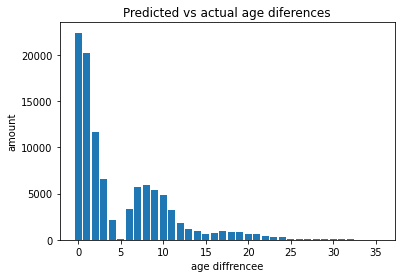

In [41]:
i = 0
x=[]
while i <= max(g):
    x.append(g.count(i))
    i= i+1
y =list(range(36))
plt.bar(y,x)
plt.title('Predicted vs actual age diferences')
plt.xlabel('age diffrencee')
plt.ylabel('amount')
plt.show()

In [44]:

### Could u add a confusion matrix so we can see what ages it struggles with

### something like this 
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=You%20can%20create%20the%20confusion,False%20Negatives%2C%20and%20True%20negatives.

# Predicting signs as a joke  

In [ ]:
stars= ["Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo", "Libra", 
        "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"]



def star(lis):
    k = []
    for i in lis:
        k.append(star.index(i))
    return k


In [ ]:
star(df_train.sign)

In [ ]:
y_train_start = star(df_train.sign)

y_test_star = star(df_test.sign)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_tf , y_train_star)

In [ ]:
y_hat_test = logreg.predict(X_test_tf)   #### array of predcted ages 
print(accuracy_score(y_test_star, y_hat_test))